### Data Description

Recall that AAVAiL has been experiencing a high rate of churn among its Singaporean customers since its expansion there 4 months ago. Having already procured and ingested data pertaining to the company's business in the United States and Singapore, you are ready to investigate the churn situation with exploratory data analysis, including data visualization.

Unfortunately, a storage error resulted in the loss of some of the data in the combined AAVAiL US-Singapore dataset. You have no choice but to use this corrupted data attached with this prompt for your EDA, and ultimately in building a deliverable sharing your results with key AAVAiL stakeholders. 

In the following peer review assignment you will have to load the dataset in your own Python notebook and investigate the nature and extent of the missing data therein. You will also practice visualizing differences in churn between the United States and Singapore to put AAVAiL's churn rates in context.

After that, you will build on the notebook and visualizations you have created to produce a deliverable summarizing the Singapore market situation to key AAVAiL stakeholders. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("aavail-data-visualization.csv")

In [3]:
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
df.describe()

,customer_id,age,num_streams
count,1000.000000,1000.000000,954.000000
mean,500.500000,27.532000,17.780922
std,288.819436,9.120096,4.752115
min,1.000000,14.000000,1.000000
25%,250.750000,21.000000,15.000000
50%,500.500000,24.000000,19.000000
75%,750.250000,33.000000,21.000000
max,1000.000000,57.000000,29.000000


In [6]:
df.columns

Index(['customer_id', 'country_name', 'age', 'customer_name', 'is_subscriber',
       'subscriber_type', 'num_streams'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

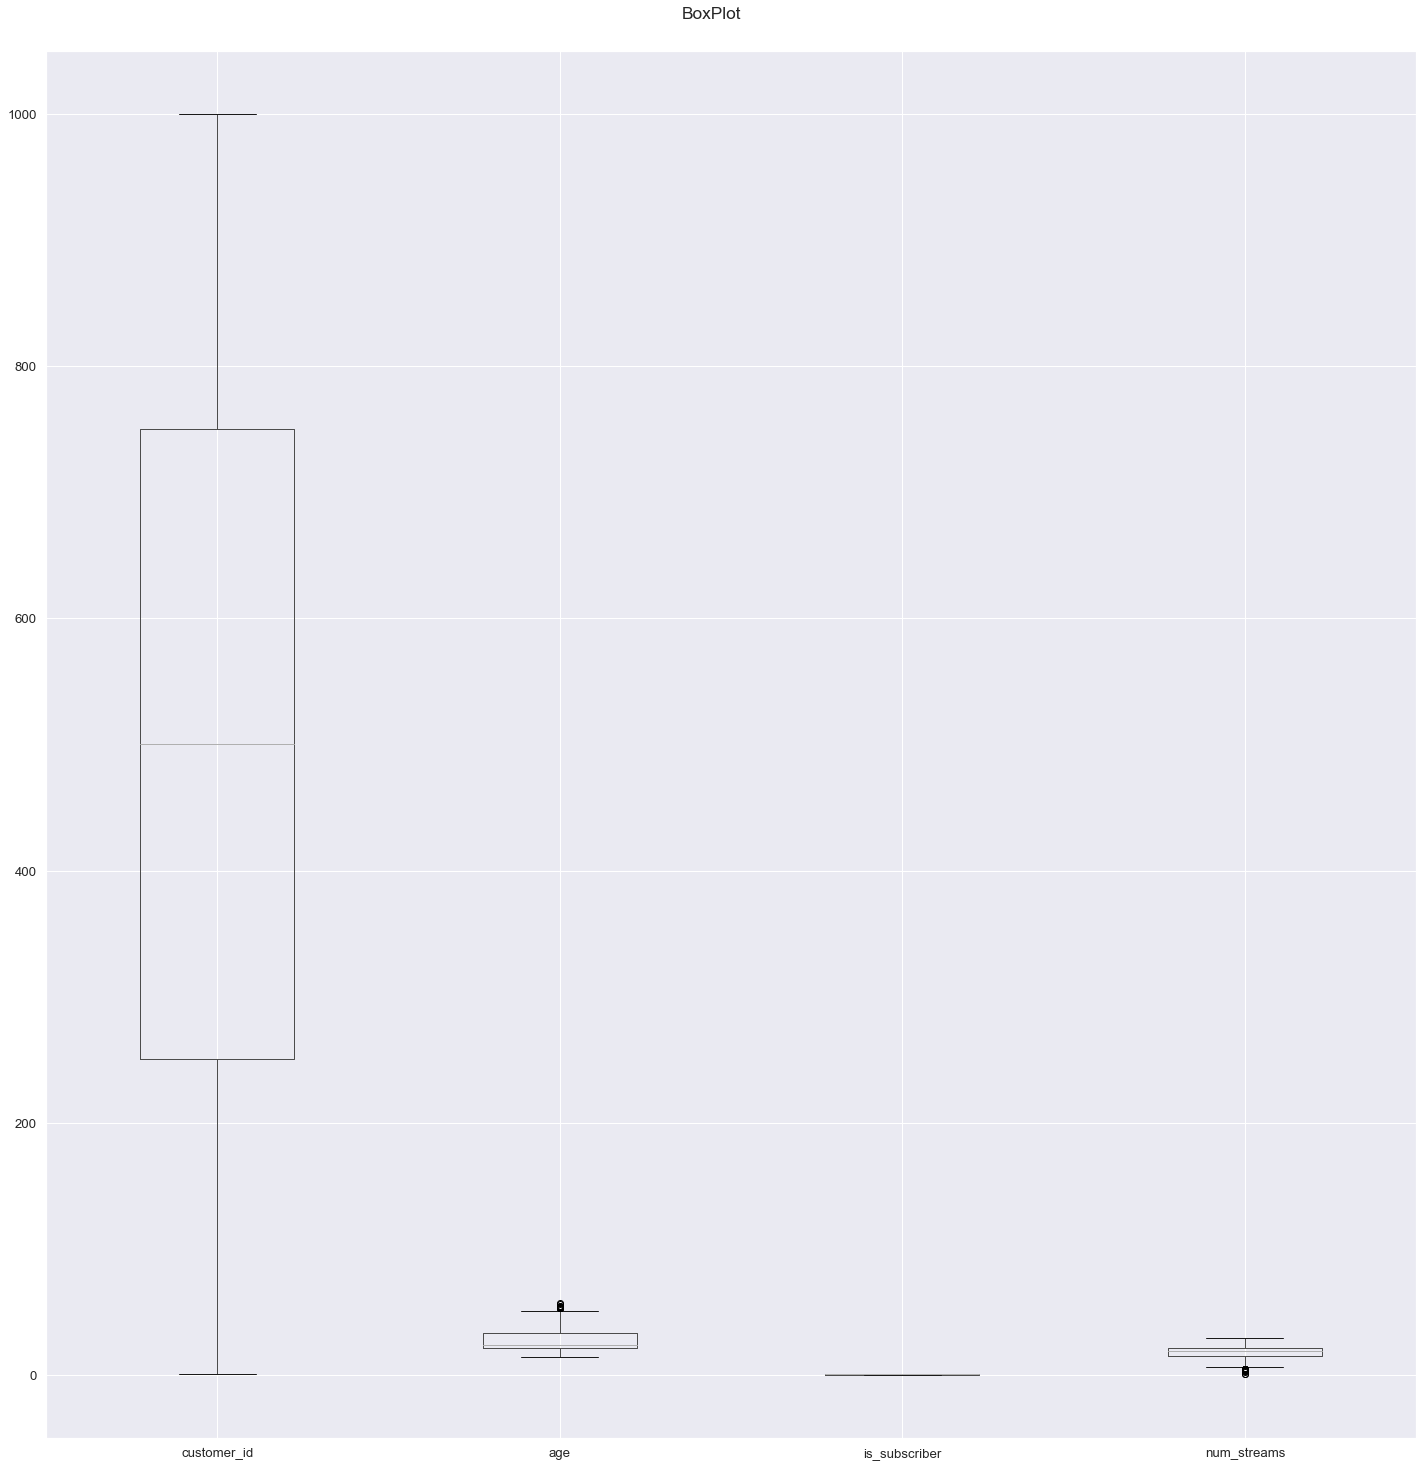

In [7]:
df.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

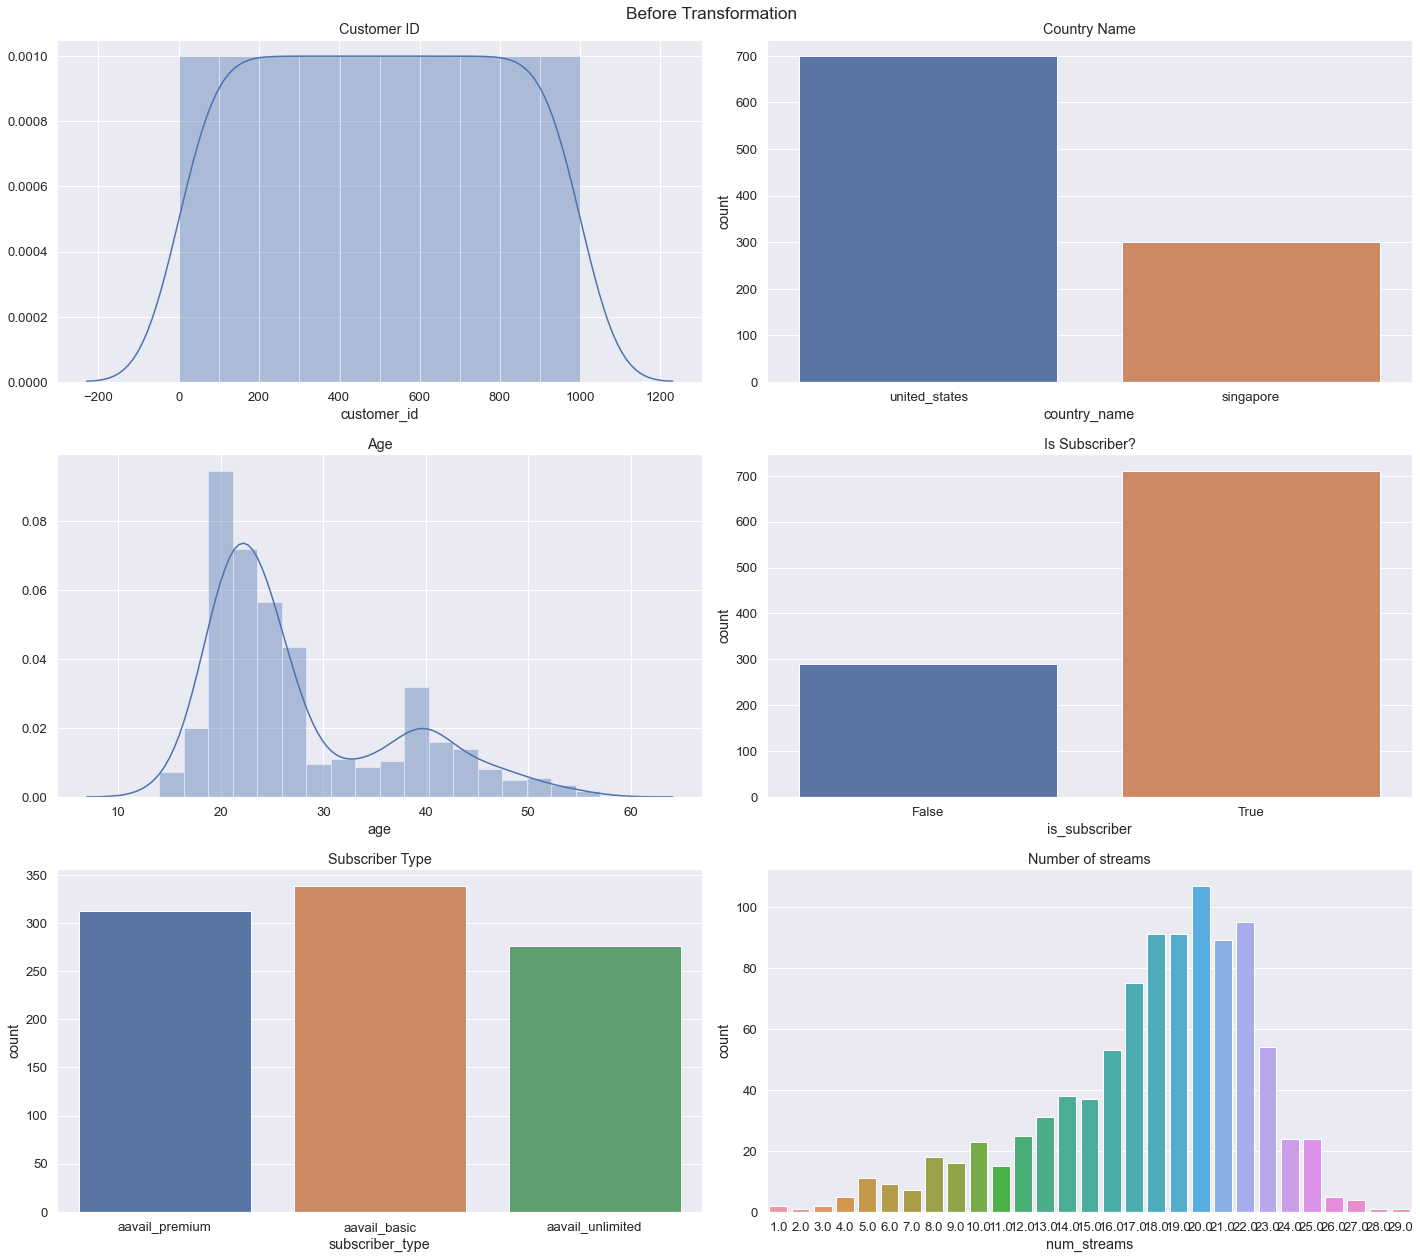

In [8]:
fig = plt.figure(figsize=(20,40))
plt.suptitle('Before Transformation', x=0.5, y=1.0, ha='center', fontsize='large')

plt.subplot(7,2,1)
plt.title("Customer ID")
sns.distplot(df.customer_id)

plt.subplot(7,2,2)
plt.title("Country Name")
sns.countplot(df.country_name)

plt.subplot(7,2,3)
plt.title("Age")
sns.distplot(df.age)

plt.subplot(7,2,4)
plt.title("Is Subscriber?")
sns.countplot(df.is_subscriber)

plt.subplot(7,2,5)
plt.title("Subscriber Type")
sns.countplot(df.subscriber_type)

plt.subplot(7,2,6)
plt.title("Number of streams")
sns.countplot(df.num_streams)


plt.tight_layout()
plt.show()

In [9]:
# plt.figure(figsize=(20,20))
# plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
# sns.pairplot(df.sample(500))
# plt.show()

### Bivariate Data Exploration

In [10]:
# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='reg')

# sns.jointplot(x='', y='',data=df, kind='reg')


# plt.show()

### Correlation

In [11]:
df.corr()

,customer_id,age,is_subscriber,num_streams
customer_id,1.000000,-0.012852,0.037503,0.033292
age,-0.012852,1.000000,0.012524,-0.034450
is_subscriber,0.037503,0.012524,1.000000,0.136306
num_streams,0.033292,-0.034450,0.136306,1.000000


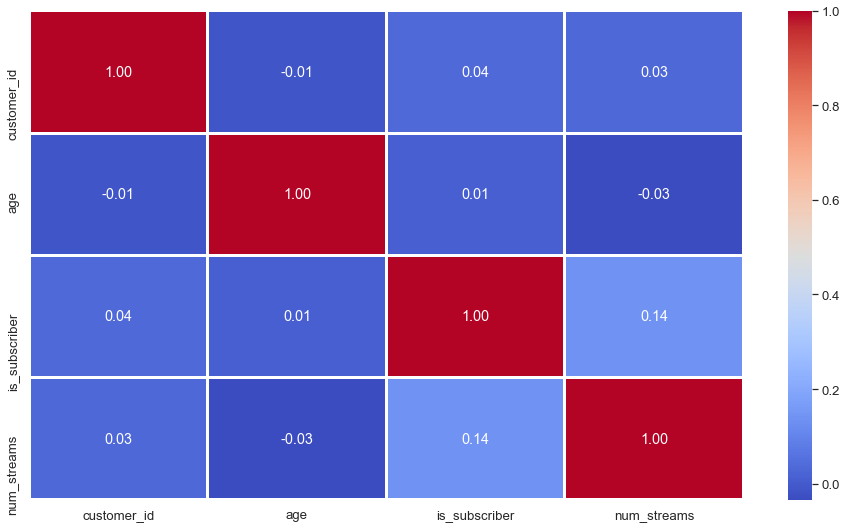

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Check Missing Data

In [13]:
df.isnull().sum()

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

### Use Median Imputation

In [14]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [15]:
imputer.fit(df)

MeanMedianImputer(variables=['customer_id', 'age', 'num_streams'])

In [16]:
df = imputer.transform(df)

In [17]:
df.isnull().sum()

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams         0
dtype: int64

In [18]:
imputer2 = mdi.CategoricalVariableImputer(variables=['subscriber_type'])

In [19]:
imputer2.fit(df)

CategoricalVariableImputer(variables=['subscriber_type'])

In [20]:
df = imputer2.transform(df)

In [21]:
df.isnull().sum()

customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64

In [22]:
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,Missing,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


### Graph after imputation

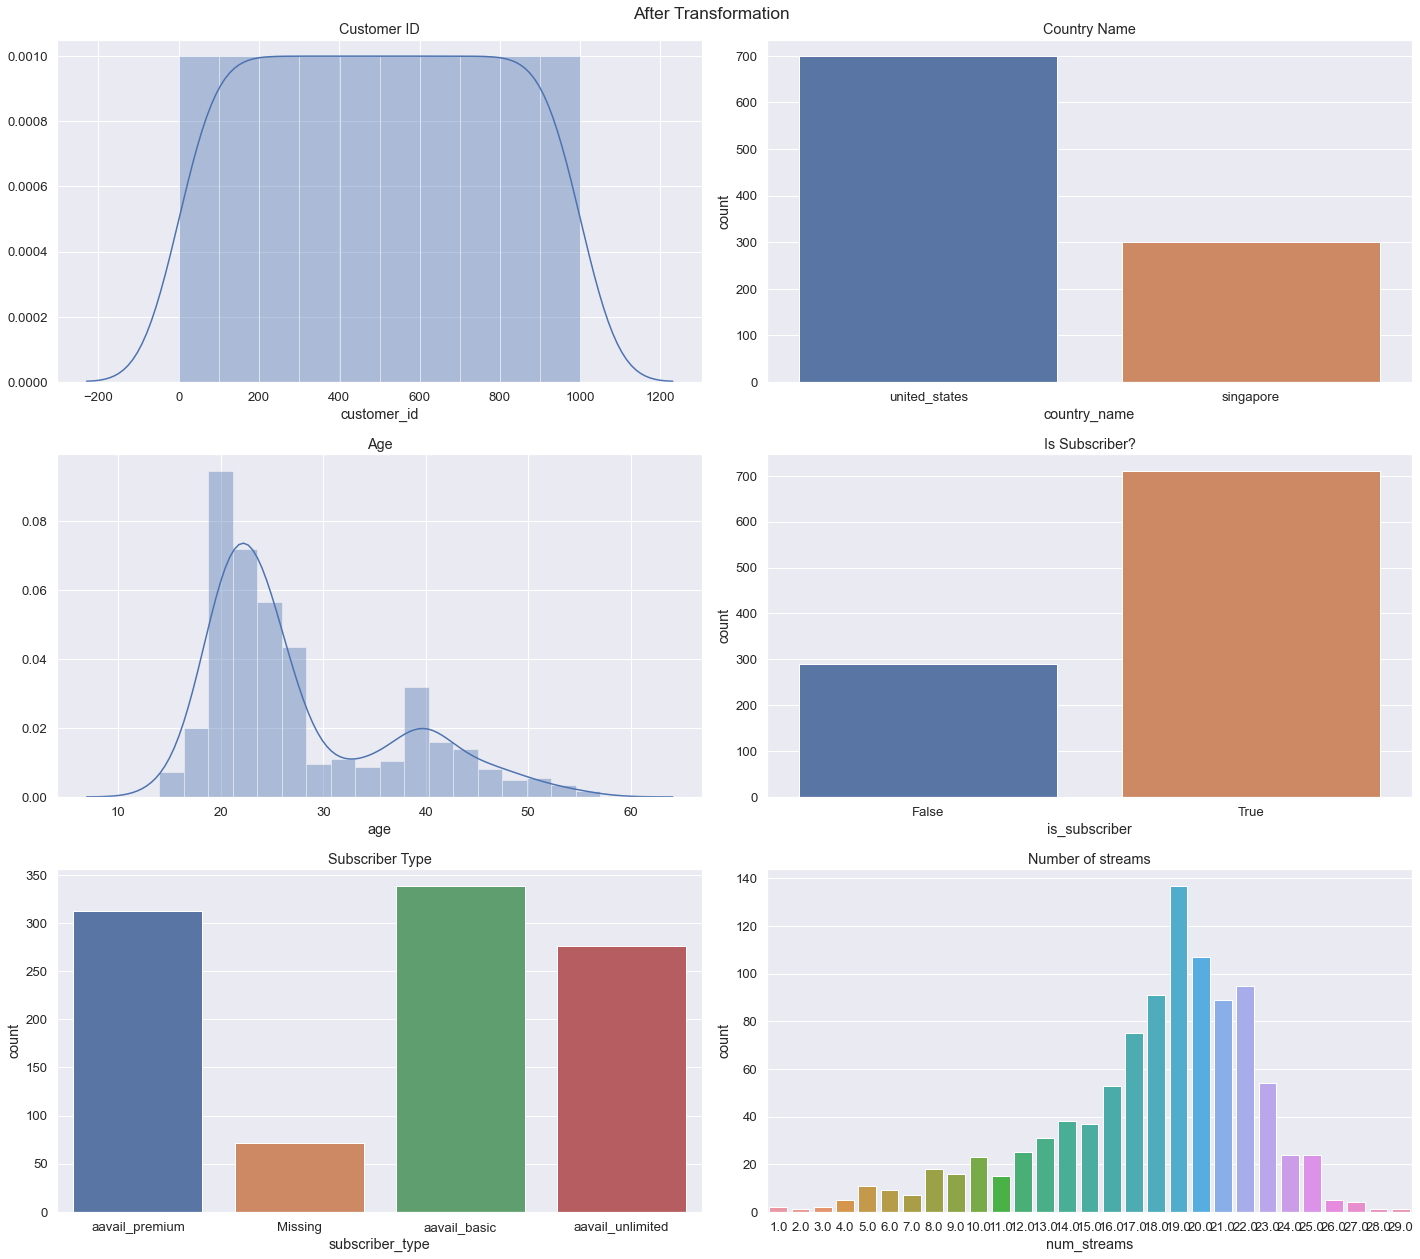

In [23]:
fig = plt.figure(figsize=(20,40))
plt.suptitle('After Transformation', x=0.5, y=1.0, ha='center', fontsize='large')

plt.subplot(7,2,1)
plt.title("Customer ID")
sns.distplot(df.customer_id)

plt.subplot(7,2,2)
plt.title("Country Name")
sns.countplot(df.country_name)

plt.subplot(7,2,3)
plt.title("Age")
sns.distplot(df.age)

plt.subplot(7,2,4)
plt.title("Is Subscriber?")
sns.countplot(df.is_subscriber)

plt.subplot(7,2,5)
plt.title("Subscriber Type")
sns.countplot(df.subscriber_type)

plt.subplot(7,2,6)
plt.title("Number of streams")
sns.countplot(df.num_streams)


plt.tight_layout()
plt.show()